# 1 Standard Scaling
Standard scaling is a preprocessing technique in machine learning. It transforms features by scaling them to have a mean of 0 and a standard deviation of 1.

The formula is as follows :-

z = (x - μ) / σ


In [2]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [3]:
# make an example dataset
df = {
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
}
df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [4]:
# import the scaler
scaler = StandardScaler()
# fit and transform the data using the scaler
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-Max Scaler

In [5]:
# import the scaler
scaler = MinMaxScaler()
# fit and transform the data using the scaler
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# MaxAbslute Scaler

In [6]:
# import the scaler
scaler = MaxAbsScaler()
# fit and transform the data using the scaler
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# Robust Scaler

In [7]:
# import the scaler
scaler = RobustScaler()
# fit and transform the data using the scaler
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


-----
# Transformation

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# generate non-normal data (explnential Distribution)
np.random.seed(0)
df= np.random.exponential(size=1000,scale=2)
df = pd.DataFrame(df,columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: ylabel='Count'>

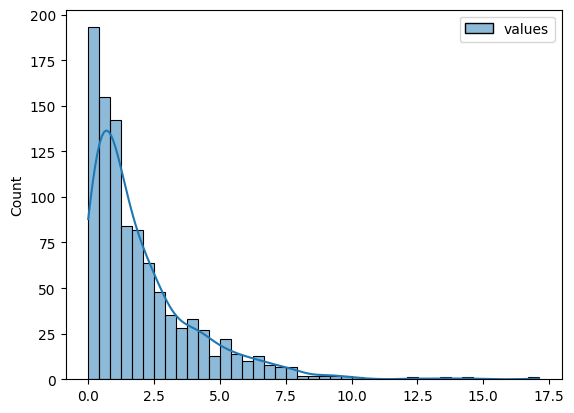

In [10]:
sns.histplot(df,kde=True)

In [11]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo_johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# Yeo Johnson transformation is not applicable for zero values, so we add a small constant to avoid division by zero error.

In [12]:
# box-cox ke liye data must be positive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
# df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])



In [13]:
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [14]:
df.head()

,values,Box_Cox,Quantile
0,1.591749,0.179335,0.162552
1,2.511862,0.677331,0.587964
2,1.846446,0.339698,0.286135
3,1.574402,0.167607,0.157469
4,1.102097,-0.202107,-0.154930


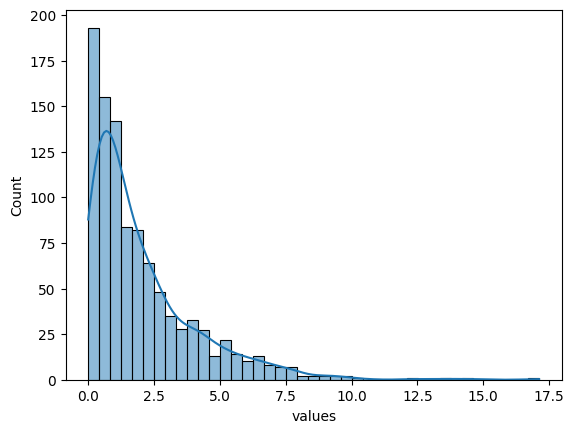

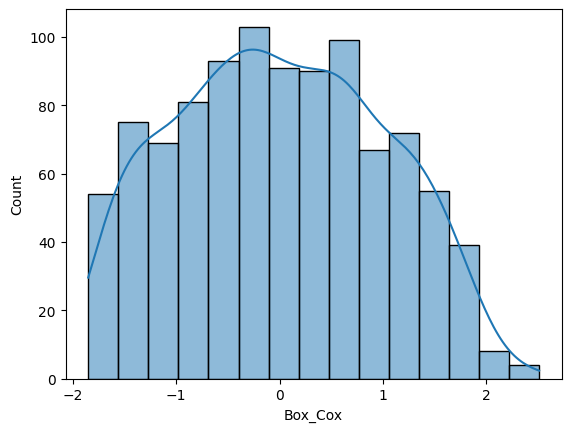

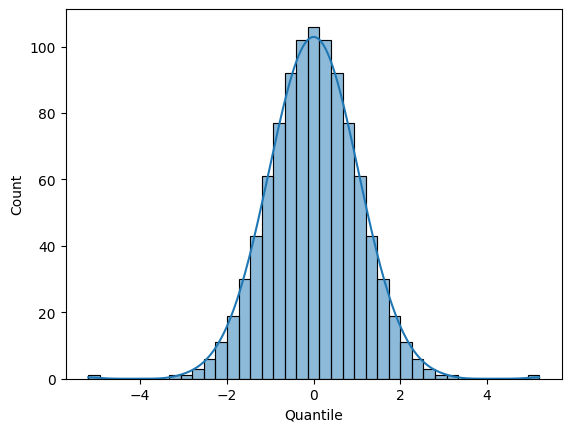

In [15]:
# create histogram for all columns using hist and kde= true using for loop

for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

----
# Normalization


In [16]:
# box-cox ke liye data must be positive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
# df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])



# L2 Normalization

L2 normalization, also known as Euclidean normalization, is a technique used to scale down the individual elements of a vector. It does this by dividing each element of the vector by the Euclidean norm of the vector. The Euclidean norm of a vector is calculated as the square root of the sum of the squares of each element in the vector.

In machine learning and data science, L2 normalization is commonly used to ensure that all features of a dataset have the same weight in the optimization process. By scaling down the larger values, L2 normalization can help prevent a bias towards large values.

In [17]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]

normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))


[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization

Also rescales each(row) but a diffrent approach, ensuring the sum of the abslute values is 1 in each  now. The L1 norm is caluclated as the sum of the abslute vecter values.



In [18]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]

normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


 1. Z-Score Normalization

        1. Standard Scaler
2. Min-Max Normalization

        1.Min-Max Scaler


# Log Transformation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

#  example dataset with skewed values
df = {'values':[1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,values
0,1
1,5
2,10
3,20
4,50


<Axes: xlabel='values', ylabel='Count'>

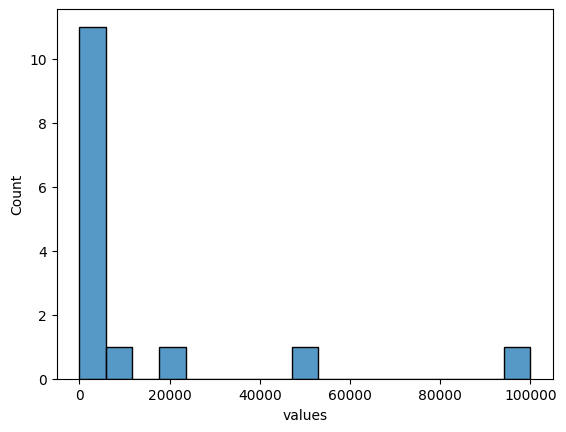

In [25]:
sns.histplot(df['values'])

In [ ]:
df['log_values'] = np.log(df['values'])
df


,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


,values,log_values
0,1,0.000000
1,5,2.321928
2,10,3.321928
3,20,4.321928
4,50,5.643856
5,100,6.643856
6,200,7.643856
7,500,8.965784
8,1000,9.965784
9,2000,10.965784


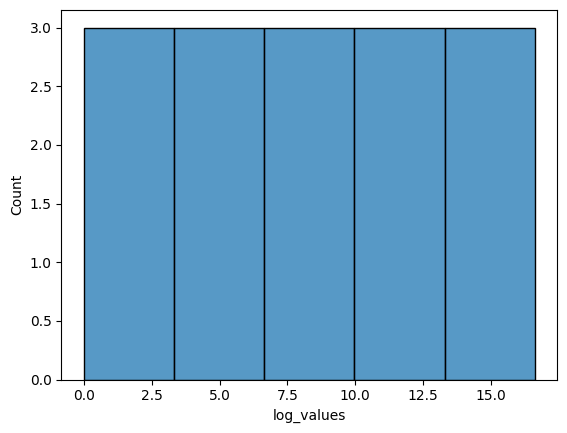

In [ ]:
df['log_values'] = np.log2(df['values'])
sns.histplot(data=df, x='log_values')
df

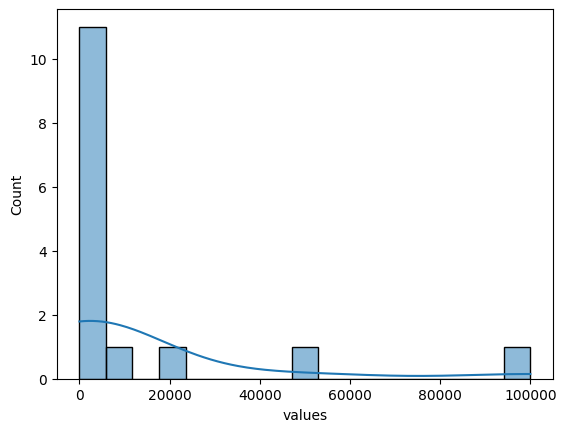

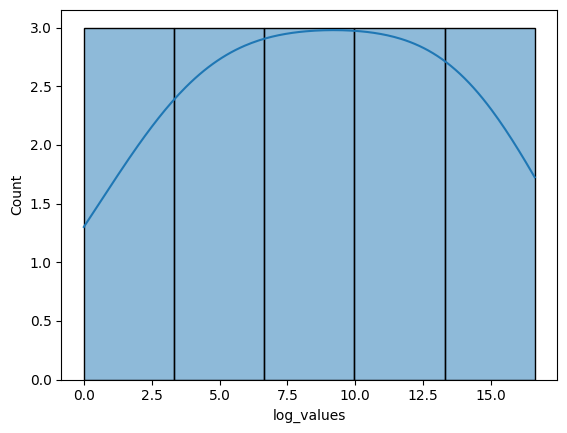

In [ ]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

# Practice File

In [ ]:
df = {
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
}
df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [ ]:
# import scaler
scaler = StandardScaler(),MinMaxScaler(),MaxAbsScaler()



In [ ]:
# fit the scaler on the data
scaled_df = scaler.fit_transform(df)
print(scaled_df)



AttributeError: 'tuple' object has no attribute 'fit_transform'

In [ ]:
# convert this into pandas dataframe
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214
